In [1]:
# libraries
#%matplotlib notebook

import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import nltk
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional

In [2]:
df = pd.read_csv(r"D:\New_Fourth_Year\Microcontroller\Gas_Sensors_Measurements.csv")

In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serial Number  6400 non-null   int64 
 1   MQ6            6400 non-null   int64 
 2   Gas            6400 non-null   object
dtypes: int64(2), object(1)
memory usage: 150.1+ KB
None


In [4]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df
# Randomize the data
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Create a timedelta range with a frequency of 1 second
time_range = pd.to_timedelta(np.arange(len(df)), unit='s')

# Create a new datetime column by adding the time range to a base datetime
base_datetime = pd.to_datetime('2023-01-01')  # Replace with your desired base datetime
df['Datetime'] = base_datetime + time_range
# Assuming your DataFrame is named df
df = pd.get_dummies(df, columns=['Gas'], prefix='Gas')
# Drop Gas columns from the DataFrame
df.drop(['Gas_Mixture', 'Gas_Perfume', 'Gas_Smoke'], axis=1, inplace=True)
# Assuming your DataFrame is named df
df['Gas_NoGas'] = df['Gas_NoGas'].astype(int)

# Display the updated DataFrame
print(df)


      Serial Number  MQ6            Datetime  Gas_NoGas
0                 0  338 2023-01-01 00:00:00          1
1                 1  339 2023-01-01 00:00:01          1
2                 2  337 2023-01-01 00:00:02          1
3                 3  336 2023-01-01 00:00:03          1
4                 4  337 2023-01-01 00:00:04          1
...             ...  ...                 ...        ...
6395           1595  414 2023-01-01 01:46:35          0
6396           1596  411 2023-01-01 01:46:36          0
6397           1597  407 2023-01-01 01:46:37          0
6398           1598  405 2023-01-01 01:46:38          0
6399           1599  402 2023-01-01 01:46:39          0

[6400 rows x 4 columns]


In [5]:
# Assuming your DataFrame is named df
from IPython.display import display

display(df)


,Serial Number,MQ6,Datetime,Gas_NoGas
0,0,338,2023-01-01 00:00:00,1
1,1,339,2023-01-01 00:00:01,1
2,2,337,2023-01-01 00:00:02,1
3,3,336,2023-01-01 00:00:03,1
4,4,337,2023-01-01 00:00:04,1
...,...,...,...,...
6395,1595,414,2023-01-01 01:46:35,0
6396,1596,411,2023-01-01 01:46:36,0
6397,1597,407,2023-01-01 01:46:37,0
6398,1598,405,2023-01-01 01:46:38,0


In [6]:
df.describe()


,Serial Number,MQ6,Datetime,Gas_NoGas
count,6400.000000,6400.000000,6400,6400.000000
mean,799.500000,399.758750,2023-01-01 00:53:19.500000,0.250000
min,0.000000,311.000000,2023-01-01 00:00:00,0.000000
25%,399.750000,366.000000,2023-01-01 00:26:39.750000128,0.000000
50%,799.500000,393.000000,2023-01-01 00:53:19.500000,0.000000
75%,1199.250000,426.000000,2023-01-01 01:19:59.249999872,0.250000
max,1599.000000,524.000000,2023-01-01 01:46:39,1.000000
std,461.916214,45.091353,NaN,0.433047


In [7]:
df.isnull().values.any()


False

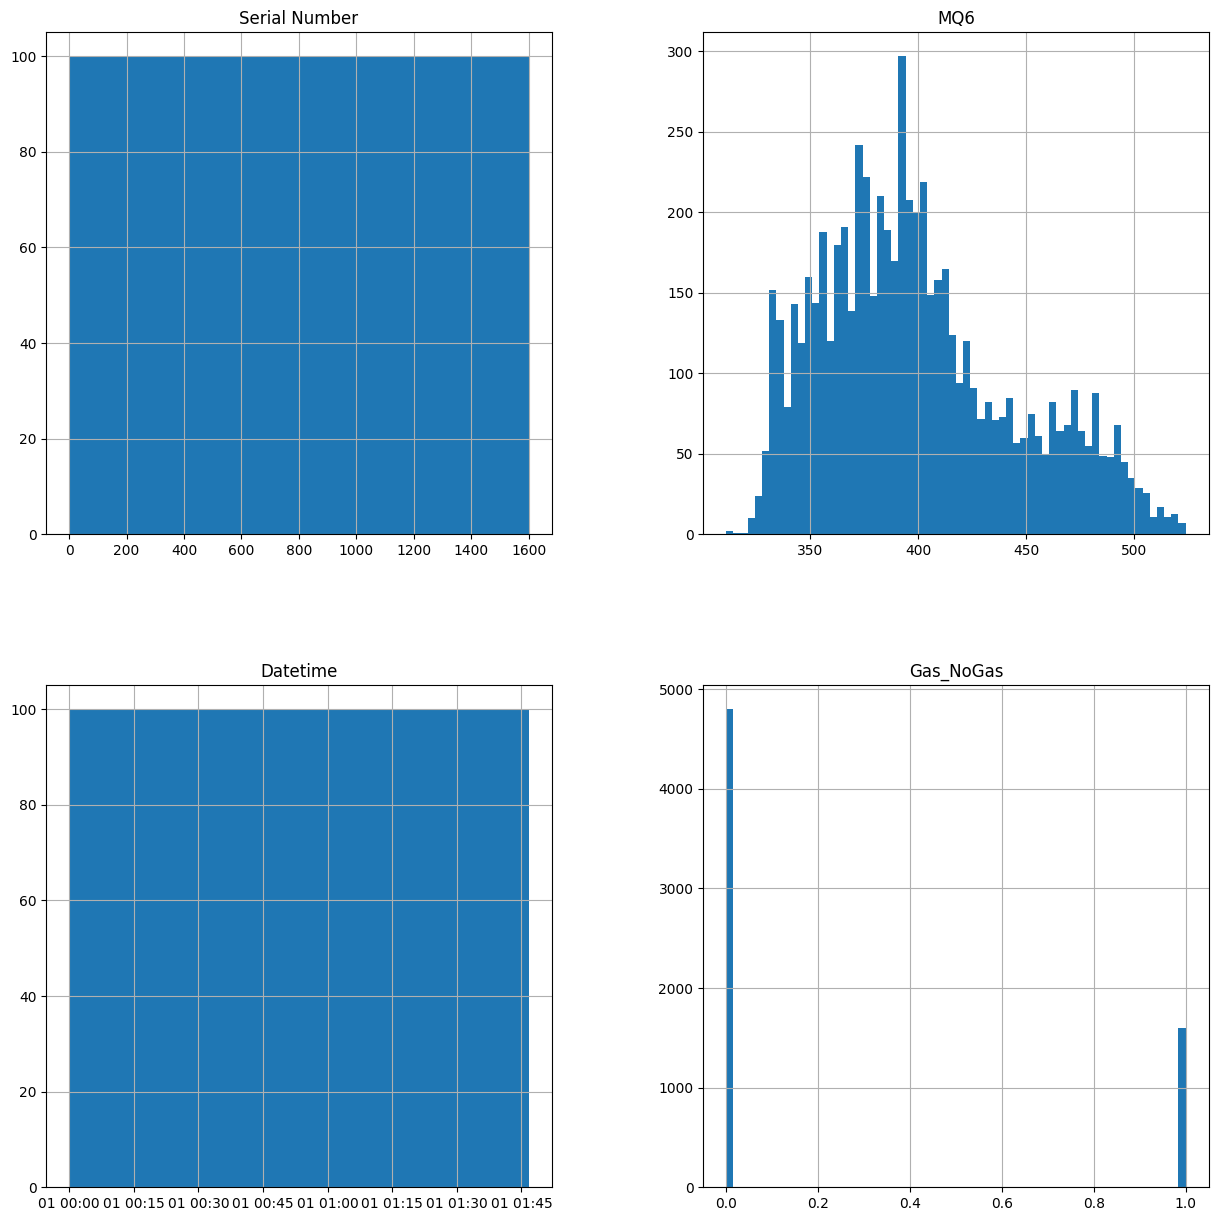

In [8]:
df.hist(figsize=(15,15), bins = 64)
plt.show()

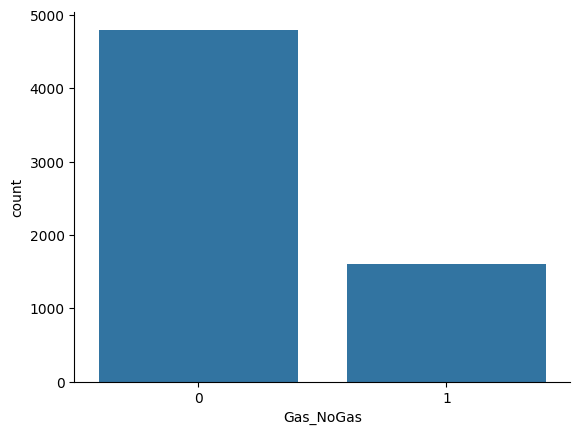

In [9]:
import seaborn as sns

sns.countplot(x=df["Gas_NoGas"])
sns.despine()

In [10]:
X = df['MQ6']
y = df['Gas_NoGas']

In [11]:
from sklearn.model_selection import train_test_split

#split data into train and test
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.2 ,stratify=y) 

In [12]:
from sklearn.dummy import DummyClassifier

#model training
#start with dummy classifier to establish baseline model
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report

#assess DummyClassifier model
confusion_matrix(y_test, dummy_pred)

array([[960,   0],
       [320,   0]], dtype=int64)

In [14]:
#use a Classification report
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       960
           1       0.00      0.00      0.00       320

    accuracy                           0.75      1280
   macro avg       0.38      0.50      0.43      1280
weighted avg       0.56      0.75      0.64      1280



c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Assume 'Gas_NoGas' is the target variable, and 'MQ6' is a continuous numerical feature
X = df['MQ6'].values.reshape(-1, 1)  # Reshape to make it compatible with LSTM input
y = df['Gas_NoGas'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1), return_sequences=True))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    
    return model

In [22]:
# # Define LSTM model function
# def create_lstm_model(hp):
#     hp_filters1 = hp.Choice('filters1', values=[32, 64, 128])
#     hp_filters2 = hp.Choice('filters2', values=[32, 64, 128])
#     hp_filters3 = hp.Choice('filters3', values=[32, 64, 128])
#     hp_filters4 = hp.Choice('filters4', values=[32, 64, 128])

#     model = Sequential()
#     model.add(LSTM(hp_filters1, input_shape=(1, 1)))
#     model.add(Dense(hp_filters2, activation='relu'))
#     model.add(Dense(hp_filters3, activation='relu'))
#     model.add(Dense(hp_filters4, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))

#     model.compile(loss='binary_crossentropy',
#                   optimizer='adam',
#                   metrics=['acc'])
#     # Compile the model
#     model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])

#     # Use early stopping
#     stop_early = EarlyStopping(monitor='val_loss', patience=8)

#     # Assuming `train_set` and `val_set` are your training and validation datasets
#     # Fit the model using the train_set and val_set
#     model.fit(X_train, epochs=50, validation_data=X_test, callbacks=[stop_early])
    
#     return model

In [23]:
# import time
# import keras_tuner as kt
# from tensorflow.keras.optimizers import Adam, SGD

# # Measure execution time
# start_time = time.time()

# # Create the Hyperband tuner with max_epochs
# tunerH = kt.Hyperband(create_lstm_model,
#                      objective='val_loss',
#                      max_epochs=50,
#                      factor=3,
#                      hyperband_iterations=2,
#                      directory='my_dir',
#                      project_name='lstm')

# stop_early = EarlyStopping(monitor='val_loss', patience=8)

# # Assuming `train_set` and `val_set` are your training and validation datasets
# # Fit the model using the train_set and val_set
# tunerH.search(X_train, validation_data=X_test, callbacks=[stop_early])

# # Get the completed trials
# completed_trials = tunerH.oracle.get_best_trials(1)

# if completed_trials:
#     # Get the best hyperparameters from completed trials
#     best_hpsH = completed_trials[0].hyperparameters
#     # Build the model with the best hyperparameters
#     modelH = tunerH.hypermodel.build(best_hpsH)
#     modelH.summary()

#     # Print the best hyperparameters
#     print(best_hpsH.values)

# # Measure the execution time
# end_time = time.time()
# print("Execution time:", end_time - start_time)

In [24]:
# import time
# import keras_tuner as kt
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM
# from sklearn.model_selection import train_test_split

# # Assume you have X_train and X_test as your input data and y_train, y_test as your target data
# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Define LSTM model function
# def create_lstm_model(hp):
#     hp_filters1 = hp.Choice('filters1', values=[32, 64, 128])
#     hp_filters2 = hp.Choice('filters2', values=[32, 64, 128])
#     hp_filters3 = hp.Choice('filters3', values=[32, 64, 128])
#     hp_filters4 = hp.Choice('filters4', values=[32, 64, 128])

#     model = Sequential()
#     model.add(LSTM(hp_filters1, input_shape=(1, 1)))
#     model.add(Dense(hp_filters2, activation='relu'))
#     model.add(Dense(hp_filters3, activation='relu'))
#     model.add(Dense(hp_filters4, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))

#     model.compile(loss='binary_crossentropy',
#                   optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
#                   metrics=['acc'])
#     # Use early stopping
#     stop_early = EarlyStopping(monitor='val_loss', patience=8)

#     # Fit the model using the train_set and val_set
#     model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[stop_early])
    
#     return model

# # Measure execution time
# start_time = time.time()

# # Create the Hyperband tuner with max_epochs
# tunerH = kt.Hyperband(create_lstm_model,
#                      objective='acc',
#                      max_epochs=50,
#                      factor=3,
#                      hyperband_iterations=2,
#                      directory='my_dir',
#                      project_name='lstm')

# # Search for the best hyperparameters
# tunerH.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# # Get the completed trials
# completed_trials = tunerH.oracle.get_best_trials(1)

# if completed_trials:
#     # Get the best hyperparameters from completed trials
#     best_hpsH = completed_trials[0].hyperparameters
#     # Build the model with the best hyperparameters
#     modelH = tunerH.hypermodel.build(best_hpsH)
#     modelH.summary()

#     # Print the best hyperparameters
#     print(best_hpsH.values)

# # Measure the execution time
# end_time = time.time()
# print("Execution time:", end_time - start_time)


In [25]:
# Create and compile the model
model = create_lstm_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1, 128)            66560     
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 128)               4224      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                

In [26]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
import datetime

# CALLBACK
# reduce learning rate when val_accuracy has stopped improving
lr_reduce = ReduceLROnPlateau(monitor='val_loss',
                                          factor=0.6,
                                          patience=2,
                                          verbose=1,
                                          mode='min',
                                          min_lr=1e-7)
# stop training when val_accuracy has stopped improving
early_stop = EarlyStopping(monitor='val_loss',
                                       patience=8,
                                       verbose=1,
                                       mode='min')
# callback to save the Keras model and (best) weights obtained on an epoch basis. here, the trained (compiled) model is saved in the current working directory as 'cifar10.h5'
checkpoint = ModelCheckpoint(f'cnn-lstm-micro-dataset-4-{datetime.datetime.now().__format__("%Y-%m-%d-%H-%M-%S")}.h5',
                                         monitor='val_loss',
                                         verbose=1,
                                         save_weights_only=False,
                                         save_best_only=True,
                                         mode='min',
                                         save_freq='epoch')

#Tensorboard
current_time = datetime.datetime.now().__format__('%Y-%m-%d-%H-%M-%S')
# tb_callback = TensorBoard(log_dir=f"./logs/ResNet18-modelv1-dataset-4-{current_time}", histogram_freq=2)

In [27]:
# Fita the Model
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.3, callbacks=[lr_reduce, early_stop, checkpoint])

Epoch 1/1000
  1/112 [..............................] - ETA: 35:09 - loss: 0.6932 - acc: 0.1562

In [ ]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

40/40 [==============================] - 0s 2ms/step - loss: 0.4226 - acc: 0.7930
Test Loss: 0.4225941300392151, Test Accuracy: 0.79296875


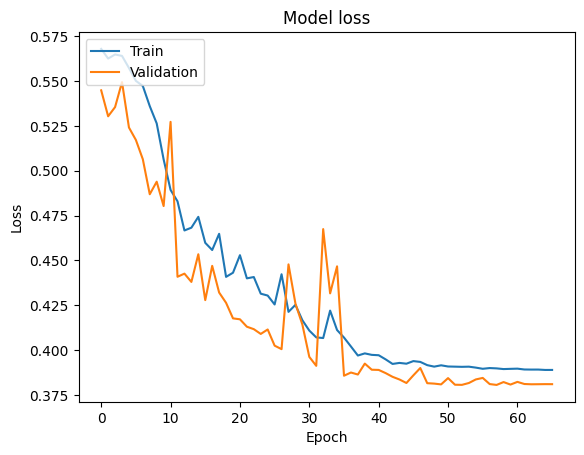

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


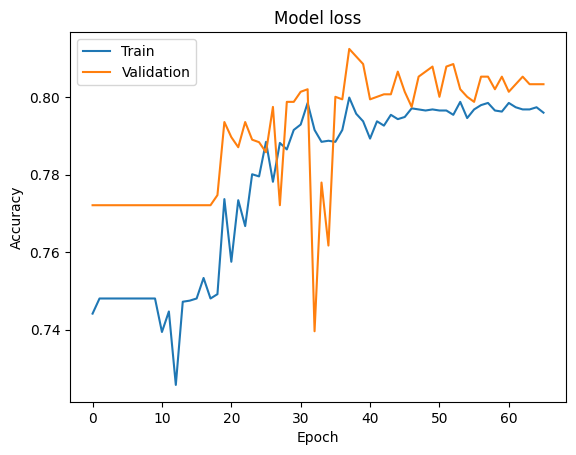

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


40/40 [==============================] - 0s 1ms/step


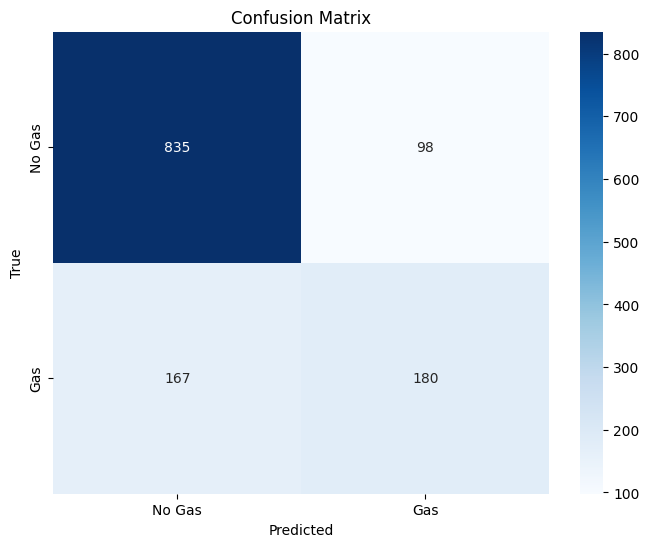

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Gas', 'Gas'], yticklabels=['No Gas', 'Gas'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Preprocess new data (reshape it appropriately)
new_data = your_new_data.reshape(-1, 1, 1)  # Adjust 'your_new_data' with your actual new data

# Make predictions
predictions = model.predict(new_data)

# Convert predictions to binary values (0 or 1) based on a threshold (e.g., 0.5)
binary_predictions = (predictions > 0.5).astype(int)

# Display the predictions
print(binary_predictions)

NameError: name 'your_new_data' is not defined